### Import useful modules

In [1]:
import pandas as pd # dataframes
import numpy as np # numerical library
import seaborn as sns # advanced plotting library
from matplotlib import pyplot as plt # plotting library
%matplotlib inline
# need this in order to display plots in notebook

### Load data

In [2]:
DATA_PATH = '/root/src/data/'

In [3]:
df_oil = pd.read_csv(DATA_PATH + 'oil.csv', parse_dates=['date'], dtype={'dcoilwtico':np.float32})

### Sneak peak

In [4]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


### Nulls in data? Yes there are!

In [5]:
print("Nulls in oil columns: {0} => {1}".format(df_oil.columns.values, df_oil.isnull().any().values))

Nulls in oil columns: ['date' 'dcoilwtico'] => [False  True]


### Deal with Nulls (remove for now)

In [6]:
def assess_missing_values(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count())
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [7]:
assess_missing_values(df_oil)

,Total,Percent
date,0,0.000000
dcoilwtico,43,0.035304


In [8]:
def drop_nulls(df, col):
    return df.drop(df.loc[df[col].isnull()].index)

In [9]:
df_oil_no_nulls = drop_nulls(df_oil, 'dcoilwtico')

In [10]:
df_oil_no_nulls.isnull().sum().max()

0

### What does the data look like

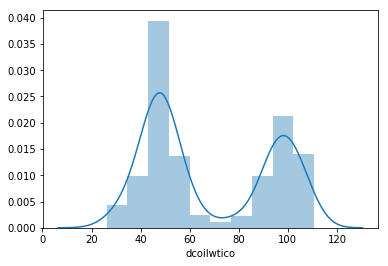

In [11]:
sns.distplot(df_oil_no_nulls['dcoilwtico']);

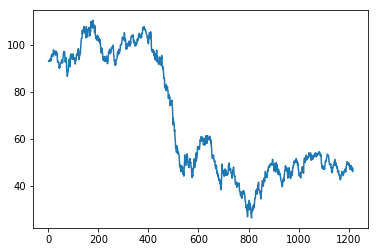

In [12]:
plt.plot(df_oil_no_nulls['dcoilwtico'])

### From the last plot I know this time-series is non-stationary (mean and variance depend on time)

I never use a non-stationary process in a time-series model/problem. In my experience, it leads to incorrect results that look promising in the beginning but break your heart (and model) when you try and predict something. It is known as spurious regression / non-stationary processes.

https://tom-christie.github.io/articles/correlation/

### So what do we do?

We make our time series stationary

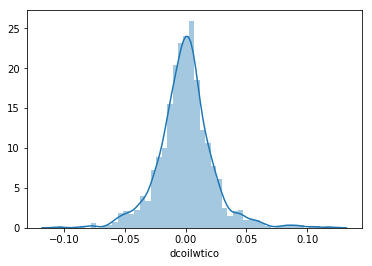

In [21]:
sns.distplot(df_oil_no_nulls['dcoilwtico'].pct_change(1).dropna())

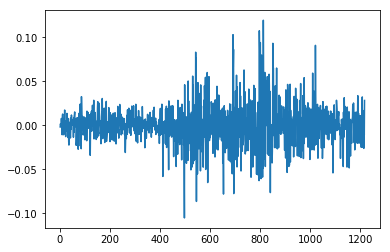

In [14]:
plt.plot(df_oil_no_nulls['dcoilwtico'].pct_change(1).dropna())

### Yay! We have a stationary time series -> mean and variance are constant over time (or atleast close to constant - welcome to the real world)